<a href="https://colab.research.google.com/github/ASR16arif/Machine-Learning/blob/main/Diabetes_Prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asrarif","key":"27d77ccdec77a7550640742bf46f9aeb"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 109MB/s]


In [8]:
!unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [9]:
import numpy as np


In [10]:
import pandas as pd

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.svm import SVC

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
diabetes_dataset = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [22]:
diabetes_dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [23]:
diabetes_dataset.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [24]:
diabetes_dataset.shape

(100000, 9)

In [25]:
diabetes_dataset_no_duplicates = diabetes_dataset.drop_duplicates()

In [26]:
print("\nDiabetes Dataset after removing duplicates:")
print(diabetes_dataset_no_duplicates)


Diabetes Dataset after removing duplicates:
       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0 

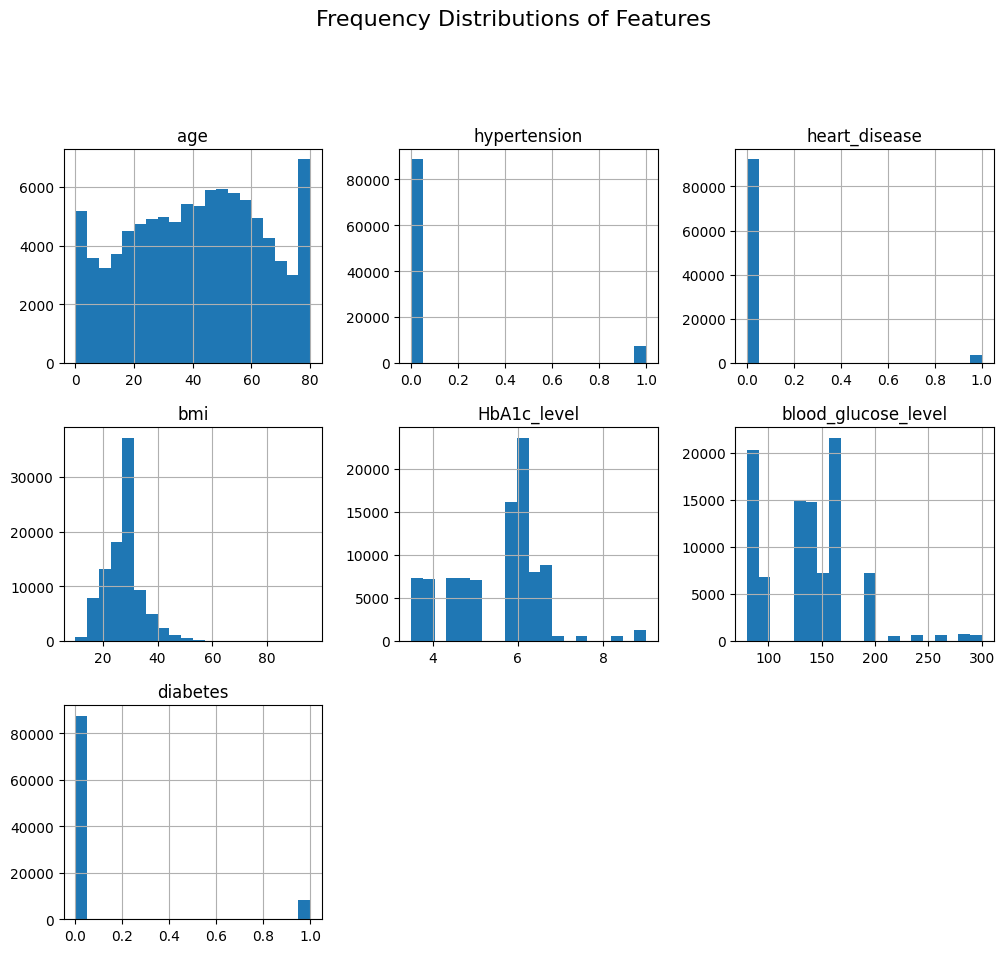

In [27]:
diabetes_dataset_no_duplicates.hist(figsize=(12, 10), bins=20)
plt.suptitle('Frequency Distributions of Features', y=1.02, fontsize=16)
plt.show()

In [28]:
target_column = 'diabetes'
features_to_analyze = ['blood_glucose_level', 'bmi', 'age']


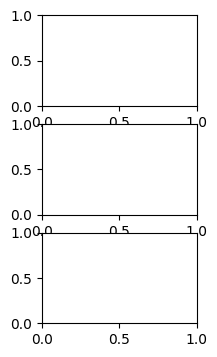

In [29]:
fig, axes = plt.subplots(nrows=len(features_to_analyze), ncols=1, figsize=(2, 4))

In [30]:
for i, feature in enumerate(features_to_analyze):
    sns.barplot(x=target_column, y=feature, data=diabetes_dataset, ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and {target_column}')
    axes[i].set_xlabel(target_column)
    axes[i].set_ylabel(feature)

In [31]:
X = diabetes_dataset_no_duplicates.drop(columns = 'diabetes' , axis = 1)
Y = diabetes_dataset_no_duplicates['diabetes']

In [32]:
print(X)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99994  Female  36.0             0              0         No Info  24.60   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  
0              6.6                  140  
1              

In [33]:
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(96146, 8) (76916, 8) (19230, 8)


In [36]:
print(X_train.shape)
print(X_test.shape)

(76916, 8)
(19230, 8)


In [37]:
from sklearn.utils import shuffle as shf

In [38]:
X_train, Y_train = shf(X_train, Y_train, random_state=15)
X_test, Y_test = shf(X_test, Y_test, random_state=15)

In [39]:
numeric_features = [i for i in range(X.shape[1])]

In [40]:
from sklearn.pipeline import Pipeline

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
from sklearn.compose import ColumnTransformer

In [47]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


In [54]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [55]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [48]:
from sklearn.naive_bayes import GaussianNB

In [69]:
classifiers = {

    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

In [70]:
scores = []

In [71]:
for name, classifier in classifiers.items():
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', classifier)])

In [72]:
model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'smoking_history'], dtype='object'))])),
                ('classifier', GaussianNB())])

In [73]:
Y_pred_train = model.predict(X_train)

In [74]:
train_accuracy = accuracy_score(Y_train, Y_pred_train)

In [75]:
Y_pred_test = model.predict(X_test)

In [76]:
test_accuracy = accuracy_score(Y_test, Y_pred_test)

In [77]:
scores.append({
        'Classifier': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

In [79]:
accuracy_df = pd.DataFrame(scores)
print(accuracy_df)

    Classifier  Train Accuracy  Test Accuracy
0  Naive Bayes        0.624044       0.627353


In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [81]:
results = []

In [82]:
cm_train = confusion_matrix(Y_train, Y_pred_train)

In [83]:
cm_test = confusion_matrix(Y_test, Y_pred_test)

In [84]:
results.append({
        'Classifier': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Confusion Matrix (Train)': cm_train,
        'Confusion Matrix (Test)': cm_test
    })


In [85]:
for result in results:
    print(f"\nResults for {result['Classifier']}:\n")
    print(f"Train Accuracy: {result['Train Accuracy']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("\nConfusion Matrix (Train):\n", result['Confusion Matrix (Train)'])
    print("\nConfusion Matrix (Test):\n", result['Confusion Matrix (Test)'])
    print("\nClassification Report (Test):\n", classification_report(Y_test, model.predict(X_test)))
    print("\n--------------------------------------------------")


Results for Naive Bayes:

Train Accuracy: 0.6240
Test Accuracy: 0.6274

Confusion Matrix (Train):
 [[41444 28686]
 [  231  6555]]

Confusion Matrix (Test):
 [[10425  7109]
 [   57  1639]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.99      0.59      0.74     17534
           1       0.19      0.97      0.31      1696

    accuracy                           0.63     19230
   macro avg       0.59      0.78      0.53     19230
weighted avg       0.92      0.63      0.71     19230


--------------------------------------------------


In [86]:
from sklearn.model_selection import cross_val_score

In [88]:
naive_bayes_model = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', classifier)])

In [89]:
cv_scores = cross_val_score(naive_bayes_model, X, Y, cv=10, scoring='accuracy')

In [90]:
print("Accuracy for each fold:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Accuracy for each fold: [0.62610504 0.63785751 0.61965679 0.64066563 0.62454498 0.62558502
 0.6208654  0.62783441 0.61327231 0.61067194]
Mean Accuracy: 0.6247059037343812
